# Importing Libraries

In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LinearRegression

# Dataset

In [2]:
df = pd.read_csv('StreetEasy.csv')

In [3]:
df.shape

(3539, 18)

In [4]:
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


# Data Cleaning

## Renaming Columns (Features)

In [5]:
df.columns = ["ID", "Rent", "No. Beedrooms", "No. Bathrooms", "Area (sqft)", "Minutes to Subway", "Floor", "Building Age (Years)",
              "No Borook", "Roof", "Washer/Dryer", "Doorman", "Elevator", "Dishwasher", "Patio", "Gym", "Neighborhood", "Borough"]

In [6]:
df.head()

,ID,Rent,No. Beedrooms,No. Bathrooms,Area (sqft),Minutes to Subway,Floor,Building Age (Years),No Borook,Roof,Washer/Dryer,Doorman,Elevator,Dishwasher,Patio,Gym,Neighborhood,Borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


## Removing Non-numerical Values

In [7]:
X = df[["No. Beedrooms", "No. Bathrooms", "Area (sqft)", "Minutes to Subway", "Floor", "Building Age (Years)",
              "No Borook", "Roof", "Washer/Dryer", "Doorman", "Elevator", "Dishwasher", "Patio", "Gym"]]

In [8]:
X.shape

(3539, 14)

In [9]:
X.head()

,No. Beedrooms,No. Bathrooms,Area (sqft),Minutes to Subway,Floor,Building Age (Years),No Borook,Roof,Washer/Dryer,Doorman,Elevator,Dishwasher,Patio,Gym
0,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1
1,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0
2,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0
3,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1
4,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1


### Dataset of Dependent Variables

In [10]:
y = df[['Rent']]

In [11]:
y.shape

(3539, 1)

In [12]:
y.head()

,Rent
0,2550
1,11500
2,4500
3,4795
4,17500


# Exploratory Data Analysis

## Invistigating What Feature Best Correlate with Rent?

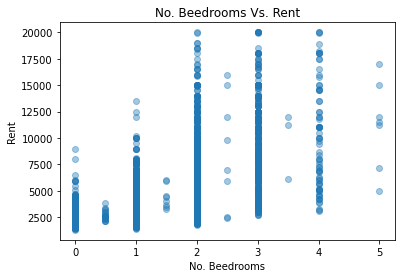

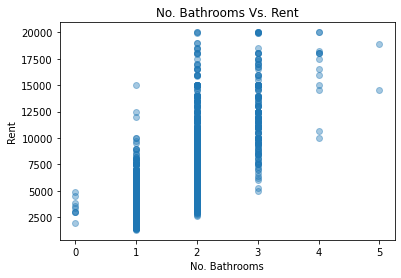

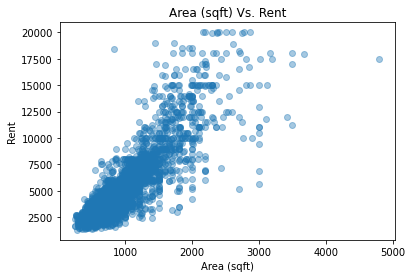

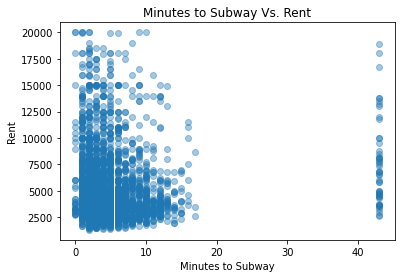

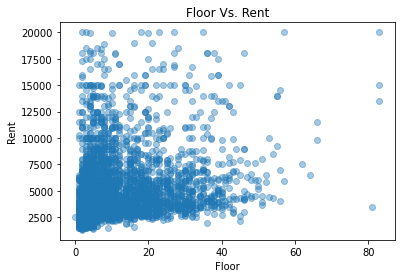

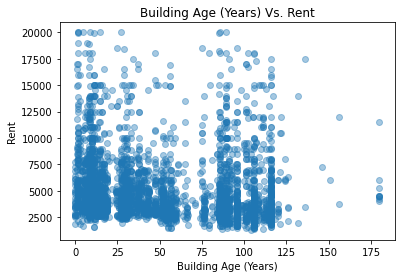

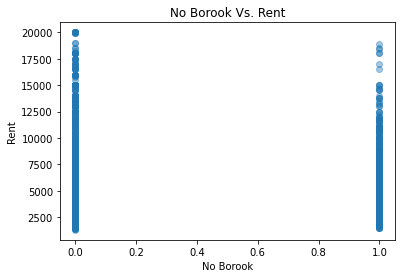

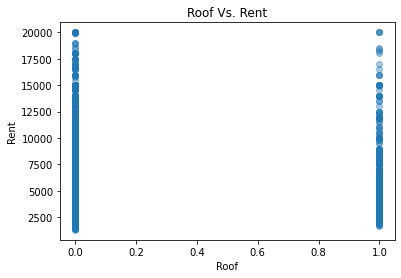

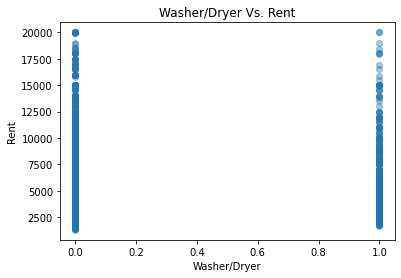

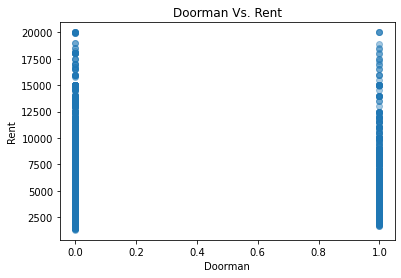

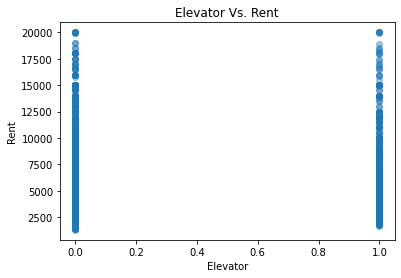

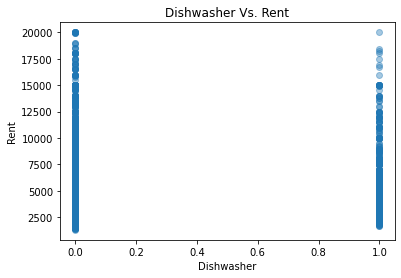

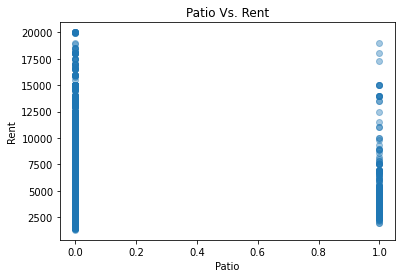

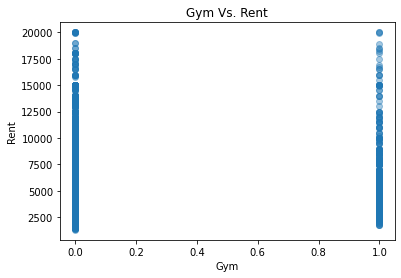

In [13]:
%matplotlib inline

for feature in X.columns:
    
    plt.scatter(X[[feature]], y, alpha = 0.4)
    
    plt.xlabel(str(feature))
    plt.ylabel("Rent")
    
    plt.title(str(feature) + " Vs. Rent")
    
    plt.show()

## Area Vs. Rent

Text(0.5, 1.0, 'Area Vs. Rent')

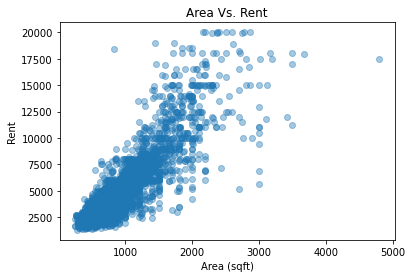

In [14]:
%matplotlib inline

x = X[['Area (sqft)']]

plt.scatter(x, y, alpha = 0.4)

plt.xlabel("Area (sqft)")
plt.ylabel("Rent")

plt.title("Area Vs. Rent")

## Training on Area

In [15]:
X = X[['Area (sqft)']]

# Splitting The Data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [17]:
X_train.shape

(2831, 1)

In [18]:
y_train.shape

(2831, 1)

In [19]:
X_test.shape

(708, 1)

In [20]:
y_test.shape

(708, 1)

# Training The Model

In [21]:
Regressor = LinearRegression()

In [22]:
Regressor.fit(X_train, y_train)

LinearRegression()

In [23]:
Regressor.coef_

array([[5.75941887]])

In [24]:
Regressor.intercept_

array([-258.67866499])

# Getting Predictions For Testing Set

In [25]:
y_predict = Regressor.predict(X_test)

In [26]:
y_predict[:5]

array([[4320.05933467],
       [5990.29080624],
       [3732.59861019],
       [5212.76925913],
       [3928.41885168]])

# Evaluating Model Accuracy

In [27]:
print("Train score:")
print(Regressor.score(X_train, y_train))

Train score:
0.7428973072049707


In [28]:
print("Test score:")
print(Regressor.score(X_test, y_test))

Test score:
0.7066194864736337
